In [1]:
%matplotlib inline

In [2]:
! pip install -U scikit-learn seaborn

     |████████████████████████████████| 6.7MB 2.6MB/s eta 0:00:01
     |████████████████████████████████| 215kB 13.4MB/s eta 0:00:01
     |████████████████████████████████| 25.2MB 11.4MB/s eta 0:00:01     |██████████████████████▊         | 17.9MB 11.0MB/s eta 0:00:01
     |████████████████████████████████| 286kB 11.2MB/s eta 0:00:01


In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

In [4]:
cd data/gpt-2/

/tf/prototypes/gpt-2/tf2/data/gpt-2


In [6]:
with open('features.pickle', 'rb') as f:
    b = pickle.load(f)

feature_vectors = np.array(list(b.values()))
print(feature_vectors)

[[ -71.77602   -73.28844   -71.224304 ...  -82.716446  -82.780876
   -64.80218 ]
 [ -66.85587   -69.618614  -65.611664 ...  -76.650314  -78.583786
   -59.98944 ]
 [ -69.09995   -71.33348   -68.56341  ...  -80.13457   -80.00867
   -62.45157 ]
 ...
 [ -88.74234   -96.06214   -90.698    ... -113.16646  -115.44641
   -68.75044 ]
 [ -76.699066  -79.59208   -76.01971  ...  -86.789696  -87.21101
   -69.57242 ]
 [-165.48212  -169.70425  -168.72816  ... -186.46718  -187.89203
  -164.93619 ]]


In [12]:
kmeans = KMeans(n_clusters=3)

In [20]:
kmeans.fit(np.squeeze(feature_vectors))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
# centroids = {
#     i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
#     for i in range(k)
# }
    
# fig = plt.figure(figsize=(5, 5))
# plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
# for i in centroids.keys():
#     plt.scatter(*centroids[i], color=colmap[i])

In [49]:
labels = kmeans.predict(np.squeeze(feature_vectors))
centroids = kmeans.cluster_centers_

In [50]:
print(labels)
print(centroids)

[2 1 1 0 1]
[[ -69.5759    -65.146835  -65.5392   ...  -82.22213   -78.70817
   -70.15947 ]
 [ -82.02073   -81.546425  -83.78521  ...  -93.9744    -93.3881
   -88.22921 ]
 [ -98.68463   -99.686165 -104.19111  ... -113.16673  -110.71653
  -105.672356]]


In [51]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(np.squeeze(feature_vectors))
pca_centroids = pca.fit_transform(centroids)

In [52]:
print(pca_features)
print(pca_centroids)

[[ 4016.5386     252.58522 ]
 [ 1128.9961    -276.79385 ]
 [ -303.17957     17.066662]
 [-3519.1194     313.0379  ]
 [-1323.2368    -305.896   ]]
[[-3630.7825   -180.8085 ]
 [ -275.37592   325.89536]
 [ 3906.1582   -145.08702]]


['b', 'g', 'g', 'r', 'g']


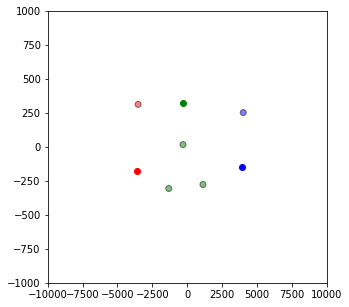

In [54]:
fig = plt.figure(figsize=(5, 5))

colors = list(map(lambda x: colmap[x+1], labels))
print(colors)

plt.scatter(pca_features[:, 0], pca_features[:, 1], color=colors, alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(pca_centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(-10000, 10000)
plt.ylim(-1000, 1000)
plt.show()

In [41]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=pca_features,
    legend="full",
    alpha=0.3
)

AttributeError: 'numpy.ndarray' object has no attribute 'get'

<Figure size 1152x720 with 0 Axes>